# Logistic Regression

a fundamental classification algorithm in ML. It's used for binary classification problems, not regression. It's widely used in various fields, including medicine, finance, marketing, and more. 

At it's core, logistic regression is a linear model that predicts the probability than an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (positive class, usually labeled as 1), otherwise it predicts that it doesn't (negative class, usually labeled as 0).


In [1]:
%pip install torch numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [3]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))


In [4]:
# generate sample data
X = torch.randn(100, 1)
y = (X > 0).float()  # Binary classification target

# define model
model = LogisticRegressionModel(1, 1)

# define loss and optimizer
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [5]:
# train the model
epochs = 500

for epoch in range(epochs):
    # forward pass
    outputs = model(X)
    loss = loss_fn(outputs, y)

    # backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


Epoch 0, Loss: 1.2386493682861328
Epoch 100, Loss: 0.9014100432395935
Epoch 200, Loss: 0.6829999685287476
Epoch 300, Loss: 0.552152693271637
Epoch 400, Loss: 0.47086331248283386


In [6]:
## evaluate the model
with torch.no_grad():
    y_pred = model(X)
    y_pred_class = y_pred.round()
    accuracy = (y_pred_class == y).float().mean()
    print(f'Accuracy: {accuracy.item():.4f}')


Accuracy: 0.9500


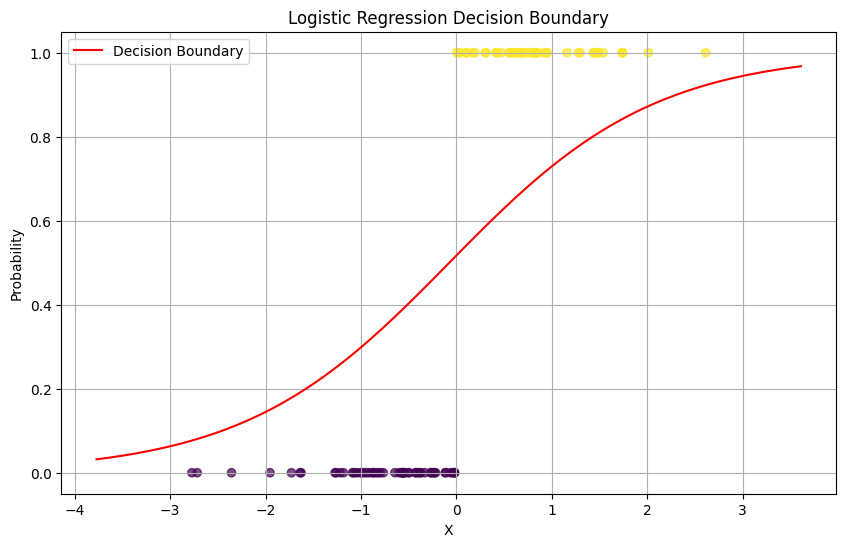

Model parameters:
linear.weight: tensor([[0.9230]])
linear.bias: tensor([0.0689])


In [7]:
# visualize the decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X.numpy(), y.numpy(), c=y.numpy(), cmap='viridis', alpha=0.7)

X_plot = torch.linspace(X.min() - 1, X.max() + 1, 100).reshape(-1, 1)

with torch.no_grad():
    y_plot = model(X_plot)

plt.plot(X_plot.numpy(), y_plot.numpy(), color='red', label='Decision Boundary')
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

print("Model parameters:")
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")